# Part I - (Ford GoBike System Data Exploration)
## by (Takalani Mbooi)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

  



## Preliminary Wrangling


In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [40]:
# load in the dataset into a pandas dataframe, print statistics
GoBike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [41]:
# high-level overview of data shape and composition
print(GoBike.shape)
print(GoBike.dtypes)
print(GoBike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [42]:
GoBike.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [43]:
# descriptive statistics for numeric variables
print(GoBike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [44]:
# The mean duration of the bikes was 726 seconds and the maximum duration was 85444 sec.

In [45]:
GoBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [46]:
## Data wrangling

In [47]:
# Data wrangling. Check for missing values

In [48]:
GoBike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [49]:
GoBike.count()

duration_sec               183412
start_time                 183412
end_time                   183412
start_station_id           183215
start_station_name         183215
start_station_latitude     183412
start_station_longitude    183412
end_station_id             183215
end_station_name           183215
end_station_latitude       183412
end_station_longitude      183412
bike_id                    183412
user_type                  183412
member_birth_year          175147
member_gender              175147
bike_share_for_all_trip    183412
dtype: int64

In [50]:
# Drop rows with missing values
GoBike = GoBike.dropna()

In [51]:
# Check if rows with missing data have been dropped
GoBike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [52]:
GoBike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### What is the structure of your dataset?

There were 183412 individual rides in the dataset. The dataset contains 16 variables, most of them are numeric in nature, user_type and member_type are catergorical data.
### What is/are the main feature(s) of interest in your dataset?

> I want to check which kind of people had more duration of riding bikes. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that subscribes,males, and older people will have long durations on the bikes. I think gender will have more effect on the duration spent on bikes.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



### How is the distribution of the main variable:duration_sec?

I'll start by looking at the distribution of the main variable of interest: duration_sec.



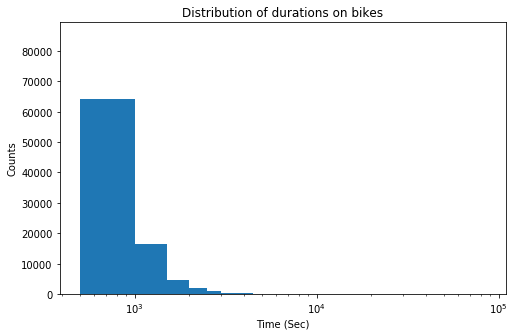

In [54]:
# start with a standard-scaled plot, 
binsize = 500
bins = np.arange(0, GoBike['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = GoBike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Time (Sec)')
plt.title('Distribution of durations on bikes')
plt.ylabel('Counts')
plt.show()

There is a long tail in the distribution of duration spent on bikes. Duration_sec has a long-tailed distribution, with a lot of seconds on the low duration end (less than 10 000 sec), and few on the high duration end.

### How is the distribution of the main variable on a log scale?

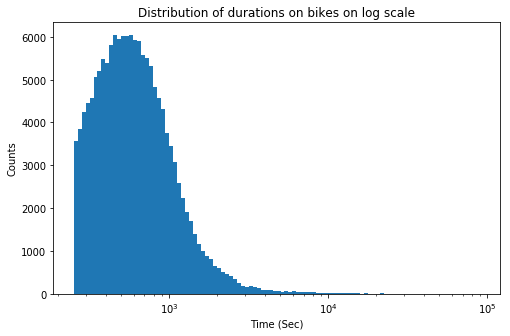

In [55]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(GoBike['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = GoBike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.title('Distribution of durations on bikes on log scale')
plt.ylabel('Counts')
plt.xlabel('Time (Sec)')
plt.show()

When the distribution of duration spent on bikes is plotted on a log-scale, the duration_sec distribution is skewed to the right, with a peak around 500 seconds.

### What are the counts of the participants per birth year?

In [56]:
# plotting birth year vs duration on a standard scale


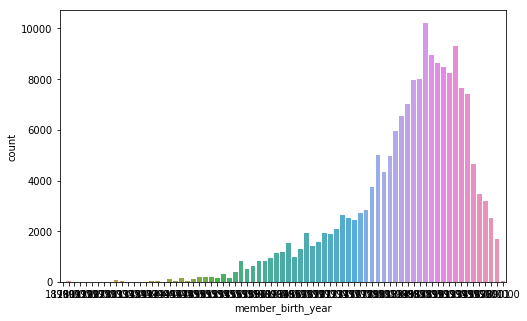

In [57]:
plt.figure(figsize=[8, 5])
sb.countplot(data=GoBike, x='member_birth_year');

Counts of the participants per birth year has the highest number in 1988, followed by year 1993. However, the orientation of x-axis scale need to be changed.

In [58]:
GoBike['member_birth_year'].value_counts()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
1992.0     8245
1987.0     8010
1986.0     7953
1994.0     7654
1995.0     7420
1985.0     7023
1984.0     6557
1983.0     5953
1980.0     5011
1982.0     4987
1996.0     4637
1981.0     4344
1979.0     3756
1997.0     3476
1998.0     3208
1978.0     2830
1977.0     2706
1974.0     2633
1999.0     2504
1975.0     2503
1976.0     2435
1973.0     2080
1968.0     1927
1971.0     1924
1972.0     1909
          ...  
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0       11
1939.0       11
1941.0        9
1901.0        6
1938.0        3
1920.0        3
1934.0        2
1944.0        2
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year,

### What are the counts of the participants per birth year, with x-ticks rotated?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

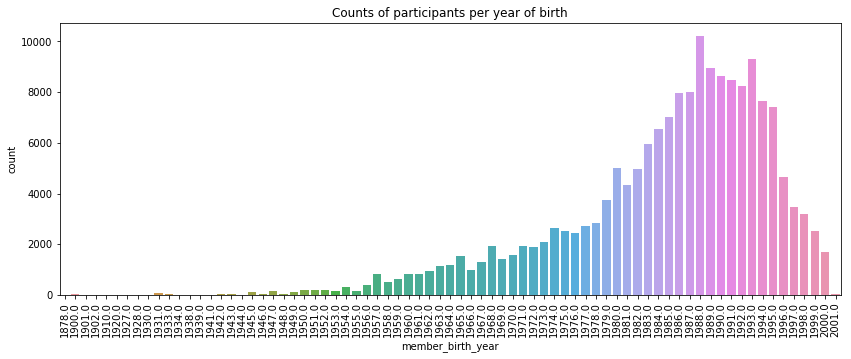

In [59]:
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.figure(figsize=[14, 5])
sb.countplot(data=GoBike, x='member_birth_year');
plt.title('Counts of participants per year of birth')
plt.xticks(rotation=90)

Counts of the participants per birth year has the highest number in 1988, followed by year 1993. X-ticks have been  rotated by 90 degree.

### What are the counts of the participants per birth year, member birth years ordered and axis inverted?

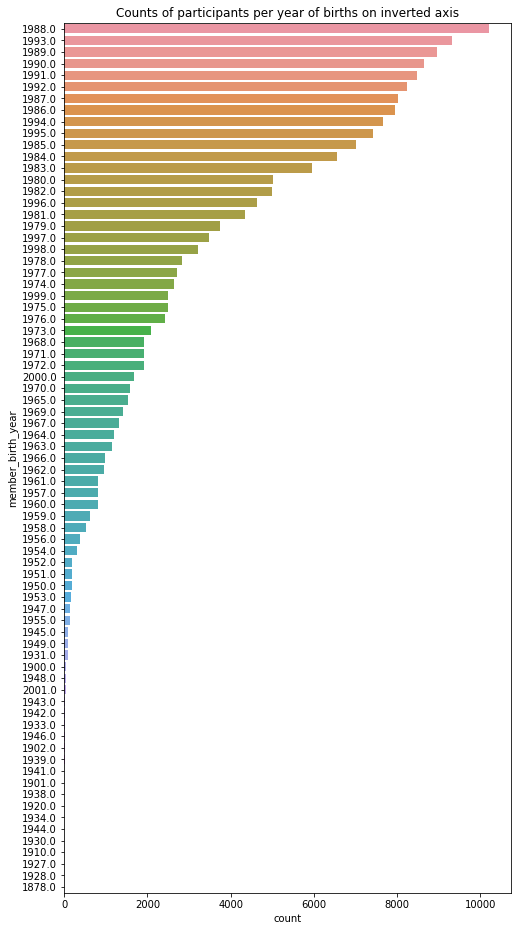

In [60]:
# Plot the Pokemon type on a Horizontal bar chart
plt.figure(figsize=[8, 16])
plt.title('Counts of participants per year of births on inverted axis')
type_order = GoBike['member_birth_year'].value_counts().index
sb.countplot(data=GoBike, y='member_birth_year', order=type_order);

Counts of the participants per birth year has the highest number in 1988, followed by year 1993. Years are ordered from one with highest count to the lowest count.

### How is the percentage of counts per member gender?

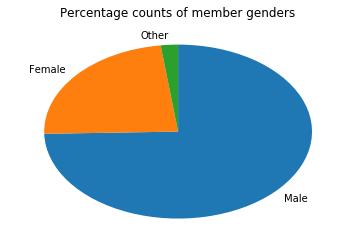

In [61]:
# Plot a pie chat gender vs counts
sorted_counts = GoBike['member_gender'].value_counts()
plt.title('Percentage counts of member genders')

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

There is a huge percentage count of male participants, followed by females, and a small percental of other gender.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is a long tail in the distribution of duration spent on bikes, I then used a log scale. Duration_sec has a long-tailed distribution, with a lot of seconds on the low duration end (less than 10 000 sec), and few on the high duration end. When plotted on a log-scale, the duration_sec distribution was skewed to the right, with a peak around 500 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Log-scale is used to make plots readables. Rows with missing values were dropped, so that there will be to gaps when comparing different variables of the data.

## Bivariate Exploration



In [62]:
#Convert string to datetime format
GoBike["start_time"] = pd.to_datetime(GoBike["start_time"])
GoBike["end_time"] = pd.to_datetime(GoBike["end_time"])

In [63]:
GoBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

Start and end time data type converted from string to datetime.

### What are the durations of user type and member gender?

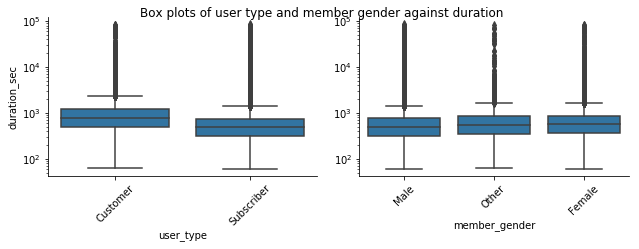

In [64]:
# plot matrix of numeric features against categorical features.


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    plt.xticks(rotation=45);
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    
plt.figure(figsize = [30, 15])
g = sb.PairGrid(data = GoBike, y_vars = ['duration_sec'], x_vars = ['user_type','member_gender'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.yscale('log')
plt.suptitle('Box plots of user type and member gender against duration ')
plt.show();

In all gender types there are more subscribers than customers. The dominant gender is male

### What are the relationships between three categorical features (user_type, member_gender, and member_birth_year)

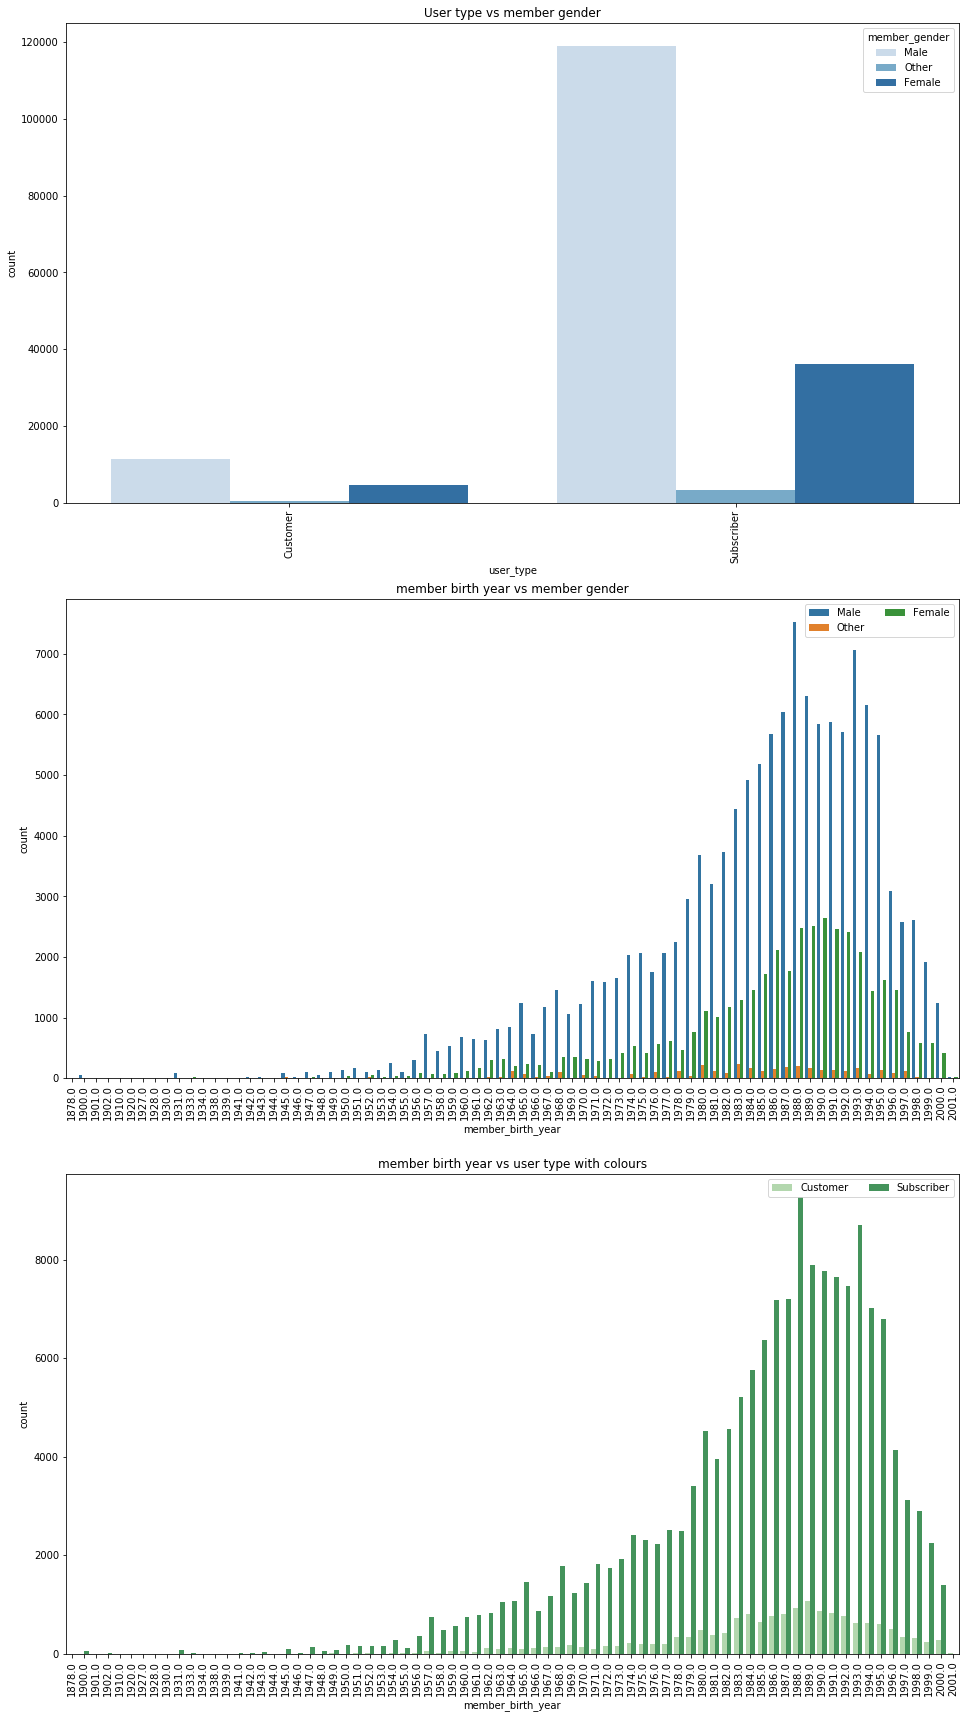

In [65]:
# Looking at relationships between the three categorical features

plt.figure(figsize = [16, 30])

# subplot 1: user_type vs member_gender
plt.subplot(3, 1, 1)
plt.title('User type vs member gender')
sb.countplot(data = GoBike, x = 'user_type', hue = 'member_gender', palette = 'Blues')
plt.xticks(rotation=90);

# subplot 2: member_birth_year vs. member_gender
ax = plt.subplot(3, 1, 2)
plt.title('member birth year vs member gender')
sb.countplot(data = GoBike, x = 'member_birth_year', hue = 'member_gender') # Default colours
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=90);

# subplot 3: member_birth_year vs. user type, use different color palette
ax = plt.subplot(3, 1, 3)
plt.title('member birth year vs user type with colours')
sb.countplot(data = GoBike, x = 'member_birth_year', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.xticks(rotation=90);
plt.show()

People who rented bikes more were born in the year 1988. There were more males who hired bikes than combined females and other gender.

In [66]:
# In all gender types there are more subscribers than customers. The dominant gender is male.
# People who rented bikes more were born in the year 1988.
# There were more males who hired bikes than combined females and other gender.

In [67]:
GoBike['member_birth_year'].value_counts()


1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
1992.0     8245
1987.0     8010
1986.0     7953
1994.0     7654
1995.0     7420
1985.0     7023
1984.0     6557
1983.0     5953
1980.0     5011
1982.0     4987
1996.0     4637
1981.0     4344
1979.0     3756
1997.0     3476
1998.0     3208
1978.0     2830
1977.0     2706
1974.0     2633
1999.0     2504
1975.0     2503
1976.0     2435
1973.0     2080
1968.0     1927
1971.0     1924
1972.0     1909
          ...  
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0       11
1939.0       11
1941.0        9
1901.0        6
1938.0        3
1920.0        3
1934.0        2
1944.0        2
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year,

In [68]:
GoBike['user_type'].value_counts()


Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [69]:

GoBike['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was an interesting observation between duration_sec and the categorical features. Customers had highest mean duration then subscribers, the mean durations for genders did not differ much, there were similer to mean duration of subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In all gender types there are more subscribers than customers. The dominant gender of participents was male. People who rented bikes more were born in the year 1988. There were more males who hired bikes than combined females and other gender. 

## Multivariate Exploration



### What is the relationship between bike share for all trip, member gender, and member birth year?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,1.1,'Member gender vs bike share for all trip vs member birth year')

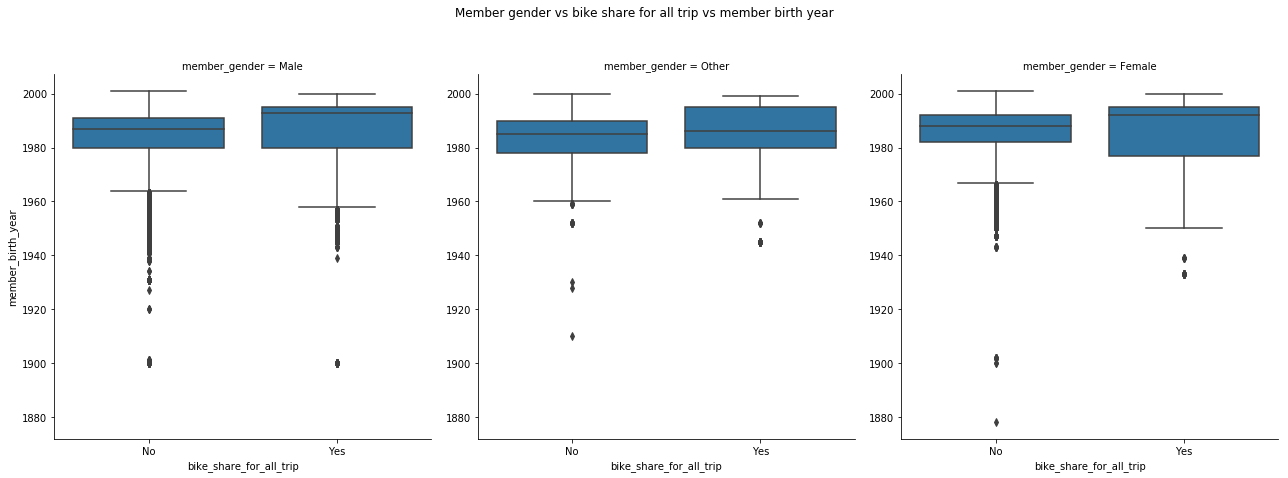

In [70]:
g = sb.FacetGrid(data = GoBike, col = 'member_gender', size = 6)
g.map(sb.boxplot, 'bike_share_for_all_trip', 'member_birth_year')
plt.suptitle('Member gender vs bike share for all trip vs member birth year', y=1.1)

Member birth year median shared bikes for trip is higher that member birth year median of no shared bikes for trip in all the genders.

### What is the relationship between user_type and member gender to the duration?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,1.1,'User type vs member gender vs duration')

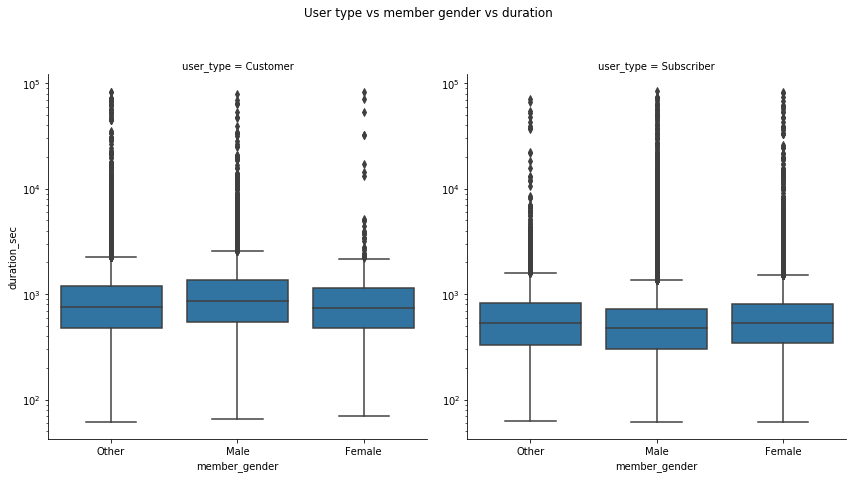

In [71]:
g = sb.FacetGrid(data = GoBike, col = 'user_type', size = 6)
plt.yscale('log')
g.map(sb.boxplot, 'member_gender', 'duration_sec')
plt.suptitle('User type vs member gender vs duration', y=1.1)

The median duration of the customers is higher than median duration of subscribers for all genders, with the median duration of males being the highest. Amoung the subscribers females have the highest median duration

### What is the relationship between member birth year, member gender, and the duration?

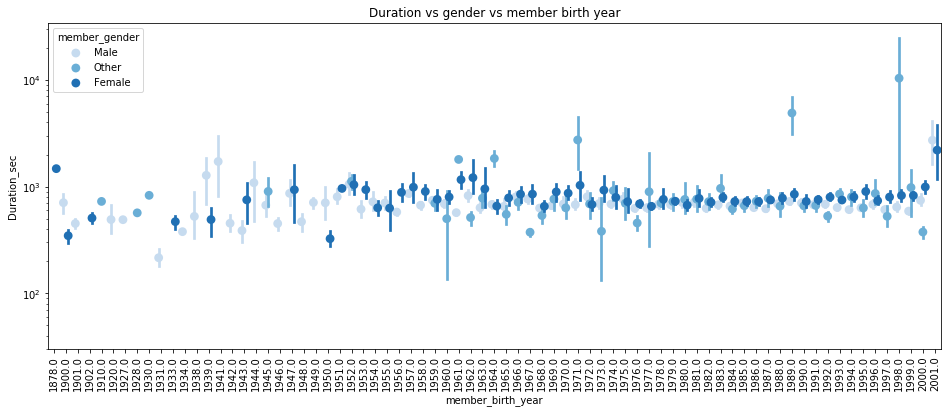

In [73]:
fig = plt.figure(figsize = [16,6])
ax = sb.pointplot(data = GoBike, x = 'member_birth_year', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation=90);
plt.title('Duration vs gender vs member birth year')
plt.ylabel('Duration_sec')
plt.yscale('log')
ax.set_yticklabels([],minor = True)
plt.show();

Looking at the point plot for people who were born before 1965, their mean duration for different genders varies by a big gap, and for the male, female and other gender who were born after 1965 their mean duration were similar and they had few outliers.

### What is the correlation between user_type, member_gether, member_birth_year to the duration?

Text(0.5,1.02,'User type vs member gender vs member birth year vs duration')

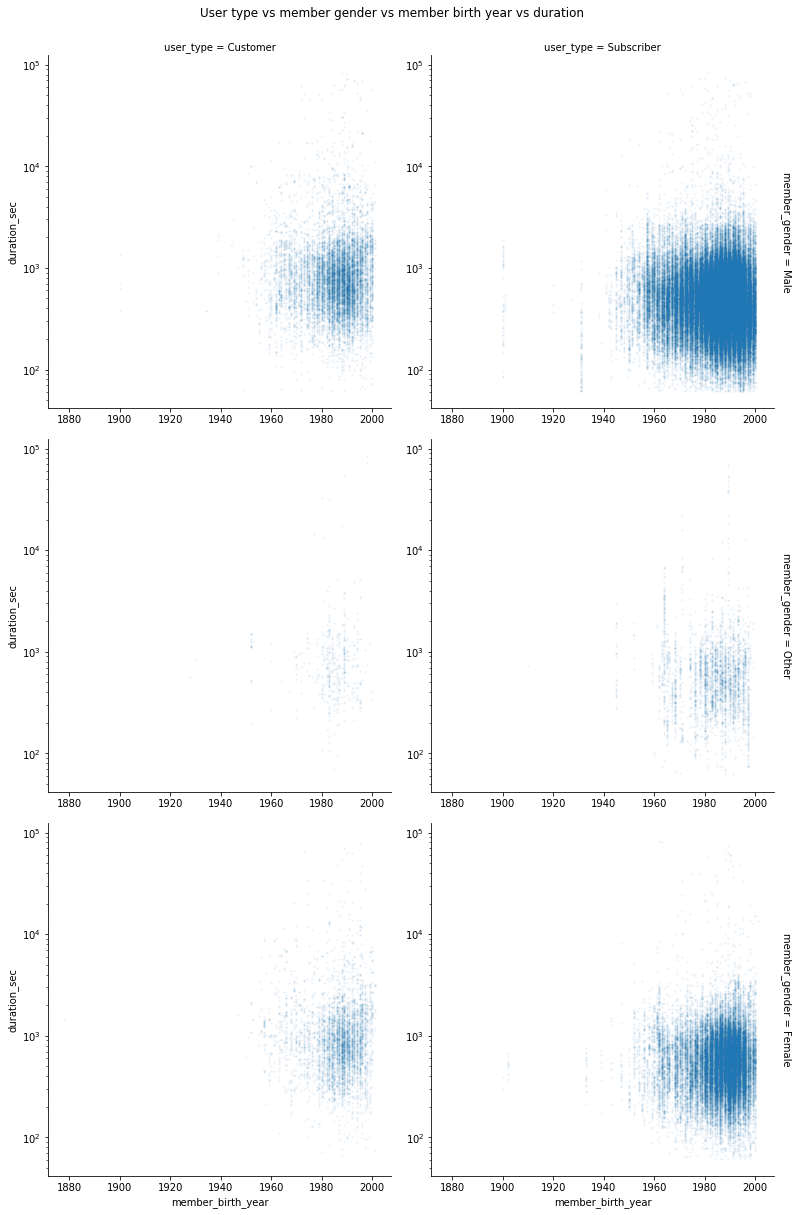

In [75]:

g = sb.FacetGrid(data = GoBike, col = 'user_type', row = 'member_gender', size = 5.5,
                margin_titles = True)
plt.yscale('log')
g.map(plt.scatter, 'member_birth_year', 'duration_sec', s=2, alpha=0.05)
plt.suptitle('User type vs member gender vs member birth year vs duration', y=1.02)

The scatter plot for duration vs user_type vs member_gether vs member_birth_year did not show any correlation

### What is the relationship between user type, duration, and member gender?

Text(0.5,1,'Duration vs gender vs user type')

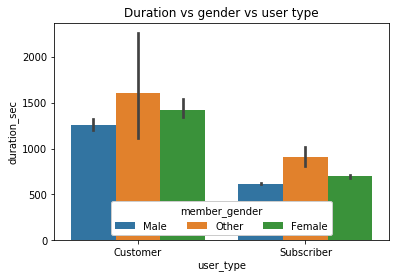

In [77]:
ax = sb.barplot(data = GoBike, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender')
plt.title('Duration vs gender vs user type')

Customers of all genders had more duration on bikes than subscribers of all genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I looked at the impact of the three categorical variables on the duration. The multivariate exploration did not show any corelation between duration and other variables (user_type, member_gender, and member_birth_year).The median duration of the customers is higher than median duration of subscribers for all genders, with the median duration of males being the highest. Amoung the subscribers females have the highest median duration.

### Were there any interesting or surprising interactions between features?

> The median of year of birth shows that Males and females who shared bikes were just younger than those who did not share. Looking at the point plot for people who were born before 1965, their mean duration for different genders varies by a big gap, and for the male, female and other gender who were born after 1965 their mean duration were similar and they had few outliers. The scatter plot for duration vs user_type vs member_gether vs member_birth_year did not show any correlation.

## Conclusions
>Dataset for this project includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Rows with missing values on variables of member_birth_year and member_gender were dropped from a dataset. There is a long tail in the distribution of duration spent on bikes, I then used a log scale for better visualisation. Duration_sec has a long-tailed distribution, with a lot of seconds on the low duration end (less than 10 000 sec), and few on the high duration end. When plotted on a log-scale, the duration_sec distribution was skewed to the right, with a peak around 500 seconds. Most of the participants were born in 1988, followed by those who were born in 1993, the age group between 1986 and 1995 is the dominant group,the counts decreases as we move left and right from the dominant group. In all gender types there are more subscribers than customers. The dominant gender is male.People who rented bikes more were born in the year 1988. There were more males who hired bikes than combined females and other gender. Looking at the point plot for people who were born before 1965, their mean duration for different genders varies by a big gap, and for the male, female and other gender who were born after 1965 their mean duration were similar and they had few outliers.
